In [1]:
import joblib
import os

In [2]:
X_path = os.path.expanduser('~/Desktop/Projects/Sentiment Analysis/data/processed/X_sparse_data.pkl')
X_sparse = joblib.load(X_path)
X = X_sparse.toarray()

y_path = os.path.expanduser('~/Desktop/Projects/Sentiment Analysis/data/processed/y_data.pkl')
y = joblib.load(y_path)

In [3]:
import sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Using Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
Lr_model = LogisticRegression()

In [5]:
Lr_model.fit(X_train, y_train)

LogisticRegression()

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_logreg = Lr_model.predict(X_test)

In [7]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred_logreg))
print('\nClassification Report:\n', classification_report(y_test,y_pred_logreg))
print('\nConfusion Matrix:\n ', confusion_matrix(y_test, y_pred_logreg))

Accuracy Score:  0.8847433699707573

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.88      0.90      0.89      4978

    accuracy                           0.88      9917
   macro avg       0.89      0.88      0.88      9917
weighted avg       0.89      0.88      0.88      9917


Confusion Matrix:
  [[4301  638]
 [ 505 4473]]


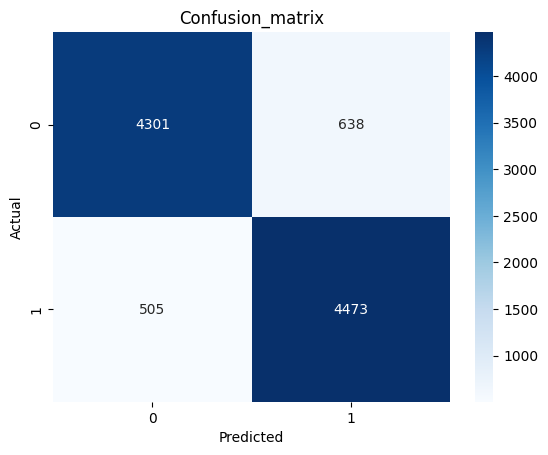

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title('Confusion_matrix')
plt.show()

## Using Naive Bias Algorithm

In [9]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [10]:
y_pred_nb = nb_model.predict(X_test)

In [11]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_nb))
print('\nClassification Report:\n ', classification_report(y_test, y_pred_nb))
print('\nConfusion Matrix:\n ', confusion_matrix(y_test, y_pred_nb))

Accuracy Score:  0.8485429061208026

Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.84      0.85      4939
           1       0.85      0.85      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917


Confusion Matrix:
  [[4163  776]
 [ 726 4252]]


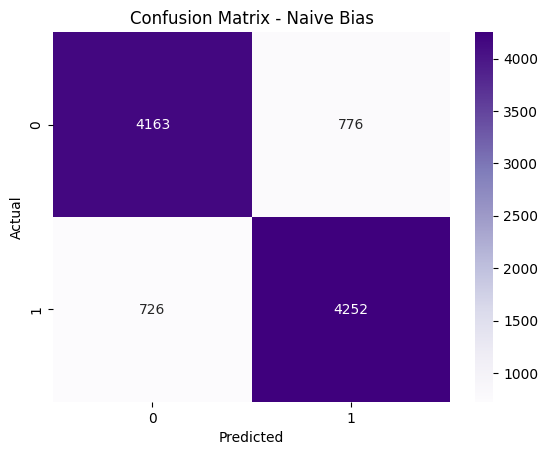

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - Naive Bias")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Using Support Vector Machine

In [13]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

C:\python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [14]:
y_pred_svm = svm_model.predict(X_test)

In [15]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_svm))
print('\nClassification Report:\n ', classification_report(y_test, y_pred_svm))
print('\nConfusion Matrix:\n ', confusion_matrix(y_test, y_pred_svm))

Accuracy Score:  0.8783906423313502

Classification Report:
                precision    recall  f1-score   support

           0       0.88      0.87      0.88      4939
           1       0.87      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917


Confusion Matrix:
  [[4298  641]
 [ 565 4413]]


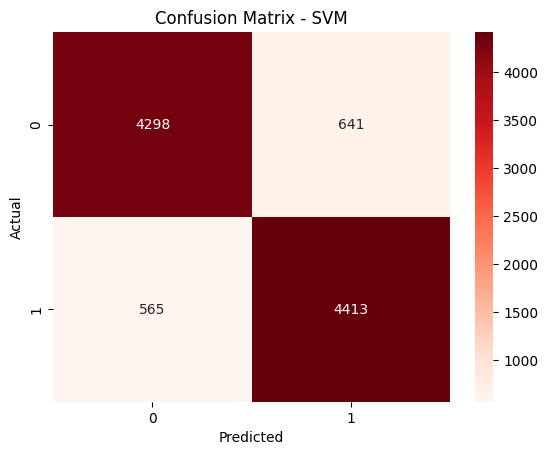

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - SVM")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Using Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier

dc_model = DecisionTreeClassifier()
dc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred_dt = dc_model.predict(X_test)

In [19]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print('\nClassification Report:\n ', classification_report(y_test, y_pred_dt))
print('\nConfusion Matrix:\n ', confusion_matrix(y_test, y_pred_dt))

Accuracy Score:  0.6979933447615206

Classification Report:
                precision    recall  f1-score   support

           0       0.70      0.69      0.70      4939
           1       0.70      0.70      0.70      4978

    accuracy                           0.70      9917
   macro avg       0.70      0.70      0.70      9917
weighted avg       0.70      0.70      0.70      9917


Confusion Matrix:
  [[3429 1510]
 [1485 3493]]


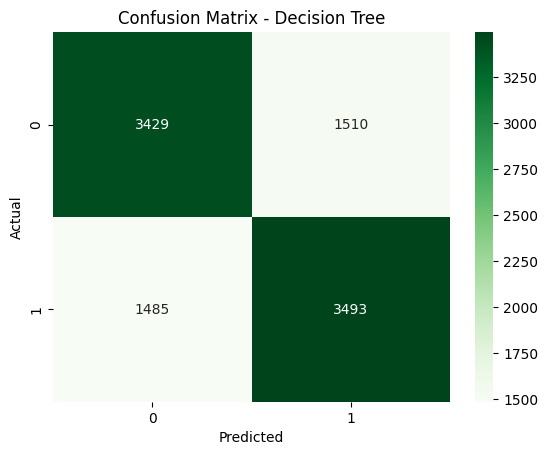

In [20]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Comparing Results of the models 

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

# Logistic Regression
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'F1-Score': f1_score(y_test, y_pred_logreg)
}

# SVM
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'F1-Score': f1_score(y_test, y_pred_svm)
}


results['NAIVE BIAS'] = {
    'Accuracy': accuracy_score(y_test, y_pred_nb),
    'Precision': precision_score(y_test, y_pred_nb),
    'Recall': recall_score(y_test, y_pred_nb),
    'F1-Score': f1_score(y_test, y_pred_nb)
}

results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-Score': f1_score(y_test, y_pred_dt)
}


import pandas as pd
df = pd.DataFrame(results).T
df

,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.884743,0.875171,0.898554,0.886708
SVM,0.878391,0.873170,0.886501,0.879785
NAIVE BIAS,0.848543,0.845664,0.854158,0.849890
Decision Tree,0.697993,0.698181,0.701687,0.699930


<Axes: >

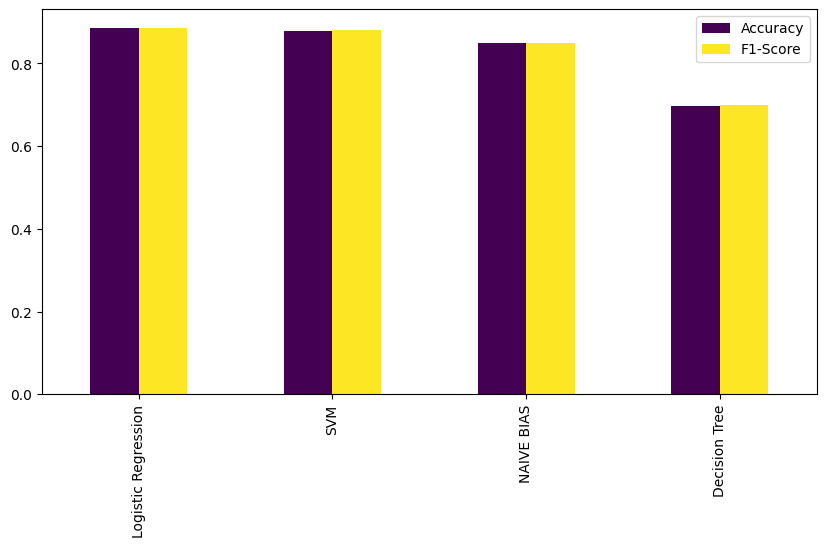

In [22]:
df[['Accuracy','F1-Score']].plot(kind='bar', figsize = (10, 5), cmap = 'viridis')

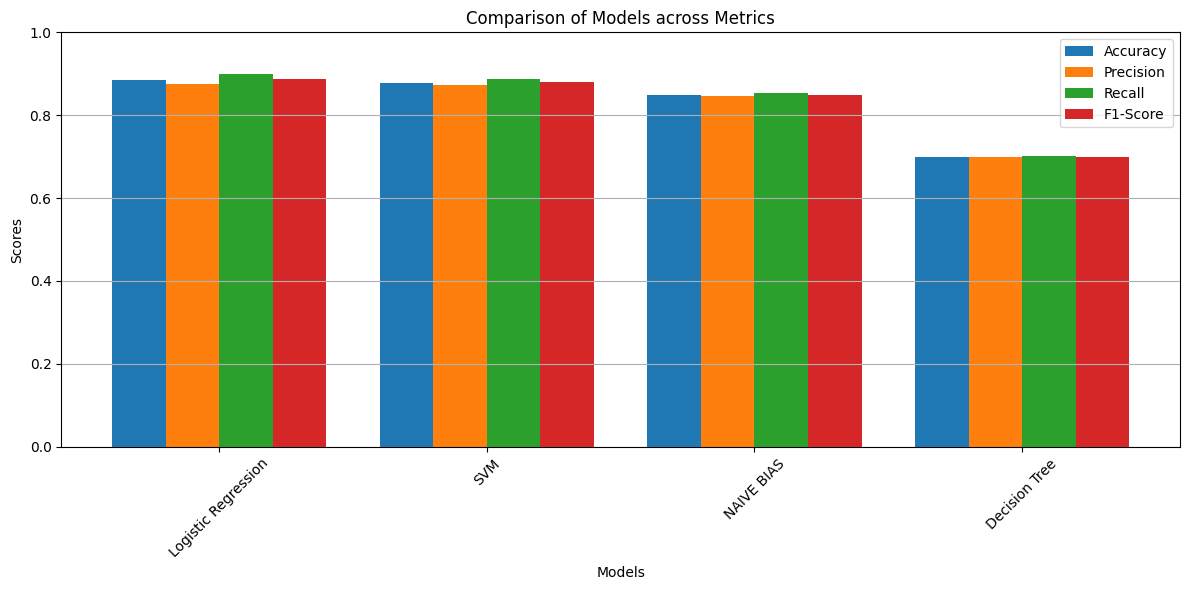

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics we want to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Models
models = df.index.tolist()

# Set position of bar on X axis
x = np.arange(len(models))

# Set width of each bar
width = 0.2

# Create the plot
fig, ax = plt.subplots(figsize=(12,6))

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, df[metric], width=width, label=metric)

# Formatting
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models across Metrics')
ax.set_xticks(x + width*(len(metrics)-1)/2)
ax.set_xticklabels(models, rotation=45)
ax.set_ylim(0, 1)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


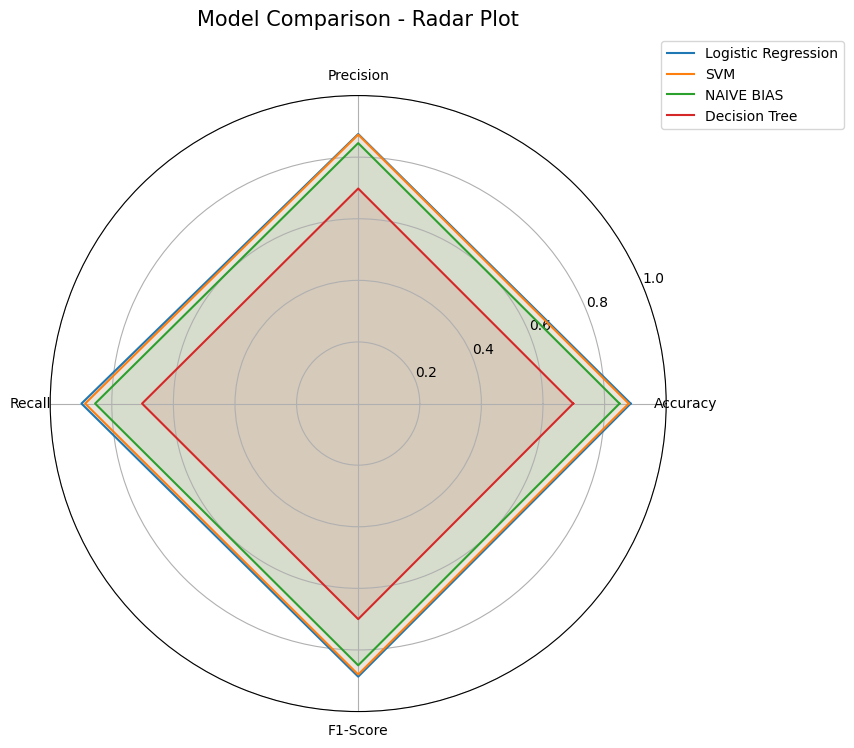

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics we want to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Models
models = df.index.tolist()

# Normalize data between 0 and 1
data = df[metrics].values

# Number of metrics
num_vars = len(metrics)

# Create angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Start plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, model_data in enumerate(data):
    values = model_data.tolist()
    values += values[:1]  # Complete the loop for each model
    ax.plot(angles, values, label=models[i])
    ax.fill(angles, values, alpha=0.1)  # Light fill for aesthetics

# Add metric labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Set y-labels
ax.set_ylim(0, 1)

# Add title and legend
plt.title('Model Comparison - Radar Plot', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


## Saving the finalized model

In [26]:
file_path_svm = os.path.expanduser('~/Desktop/Projects/Sentiment Analysis/models/svm_model.pkl')
file_path_lr = os.path.expanduser('~/Desktop/Projects/Sentiment Analysis/models/Lr_model.pkl')
joblib.dump(svm_model, file_path_svm)
joblib.dump(Lr_model, file_path_lr)



['C:\\Users\\91705/Desktop/Projects/Sentiment Analysis/models/Lr_model.pkl']